In [1]:
# Plots numerical solutions to substrate thickness

# Created 2023 May 1 by E.S.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
stem = '/Users/bandari/Documents/git.repos/glint_misc/notebooks/'

In [3]:
#df = pd.read_csv(stem + 'numerical_optimization_1st_order.csv')
#df = pd.read_csv(stem + 'junk_n1pt5_check.csv')
df = pd.read_csv(stem + 'focus_secondary_obscuration_check.csv')
#df_fresnel_fraunhofer_check = pd.read_csv(stem + 'numerical_optimization_fresnel_fraunhofer_check.csv')
#df_fresnel_fraunhofer_check = pd.read_csv(stem + 'numerical_optimization_fresnel_fraunhofer_check_bmc_irisao_sized_subaps.csv')

In [4]:
df.keys()

Index(['f_lens_substrate micron', 'defocus (waves)', 'wavel micron', 'wg_mode',
       'overl_int_circ_fraun', 'overlap_int_hex_fraun',
       'overl_int_circ_fresnel', 'overlap_int_hex_fresnel'],
      dtype='object')

KeyError: 'overl_int_circ'

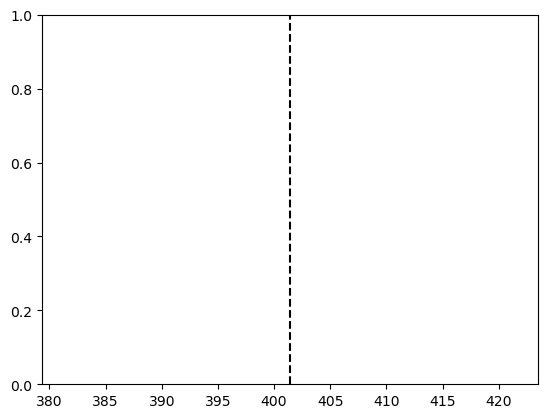

In [5]:
plt.axvline(x=401.4,linestyle='--',color='k',label='geometrical')
plt.scatter(df['f_lens_substrate micron'],df['overl_int_circ'],label='circle',s=5)
plt.scatter(df['f_lens_substrate micron'],df['overlap_int_hex'],label='hexagon',s=5)
plt.xlabel('focal length in substrate (um)')
plt.ylabel('overlap integral')
plt.legend()
plt.savefig('junk.png')

In [7]:
list(df.where(df['overl_int_circ'] > 0.71).dropna()['wg_mode'])

['AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ_csv.pkl',
 'AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ_csv.pkl',
 'AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ_csv.pkl',
 'AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ_csv.pkl',
 'AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ_csv.pkl',
 'AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ_csv.pkl',
 'AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ_csv.pkl',
 'AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ_csv.pkl',
 'AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ_csv.pkl',
 'AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ_csv.pkl',
 'AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ_csv.pkl']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0
0.1
0.2
0.3
0.4


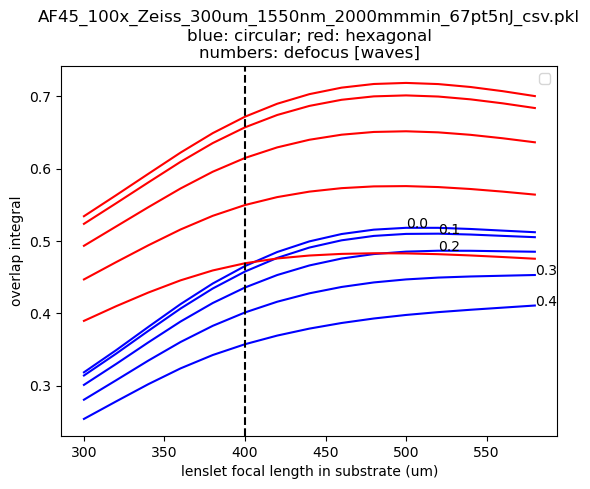

In [6]:
# separate by waveguide mode

wg_unique_list = df['wg_mode'].drop_duplicates().values
defocus_unique_list = df['defocus (waves)'].drop_duplicates().values

for wg_this in wg_unique_list:
    for defocus_this in defocus_unique_list:
        
        idx = np.logical_and(df['wg_mode'] == wg_this, df['defocus (waves)'] == defocus_this)
    
        df_this_combo = df.loc[idx]
    
        plt.plot(df_this_combo['f_lens_substrate micron'],df_this_combo['overl_int_circ_fraun'], color='blue')
        plt.plot(df_this_combo['f_lens_substrate micron'],df_this_combo['overlap_int_hex_fraun'], color='red')
        
        idx_max = df_this_combo['overl_int_circ_fraun'] == np.max(df_this_combo['overl_int_circ_fraun'])
        
        print(defocus_this)
        if defocus_this >= 0.0:
            plt.annotate( str(defocus_this), (df_this_combo['f_lens_substrate micron'].loc[idx_max], df_this_combo['overl_int_circ_fraun'].loc[idx_max]) )

    plt.axvline(x=400.,linestyle='--',color='k')
    
    plt.xlabel('lenslet focal length in substrate (um)')
    plt.ylabel('overlap integral')
    plt.legend()
    plt.title(wg_this + '\n' + 'blue: circular; red: hexagonal' + '\n' + 'numbers: defocus [waves]')
    plt.show()

In [13]:
# where is coupling maximized with thickness of 400 um?

idx_400 = np.logical_and(df['f_lens_substrate micron'] == 400., df['defocus (waves)'] == 0.)
df.where(idx_400).dropna()

,f_lens_substrate micron,defocus (waves),wavel micron,wg_mode,overl_int_circ,overlap_int_hex
204,400.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_1000mmmin_67pt5nJ...,0.666814,0.661572
892,400.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_1000mmmin_77pt5nJ...,0.662709,0.664637
1580,400.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ...,0.627527,0.603807
2268,400.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_500mmmin_75nJ_csv...,0.561065,0.573128
2956,400.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_750mmmin_50nJ_csv...,0.639596,0.619434
3644,400.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_750mmmin_77pt5nJ_...,0.573550,0.583744


In [15]:
# where is coupling maximized with any thickness

idx_max = df['overl_int_circ'] > 0.71
df.where(idx_max).dropna()

,f_lens_substrate micron,defocus (waves),wavel micron,wg_mode,overl_int_circ,overlap_int_hex
1660,500.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ...,0.711440,0.699680
1668,510.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ...,0.714612,0.704636
1676,520.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ...,0.716955,0.708794
1684,530.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ...,0.718502,0.712181
1692,540.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ...,0.719290,0.714824
1700,550.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ...,0.719366,0.716751
1708,560.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ...,0.718783,0.717993
1716,570.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ...,0.717600,0.718586
1724,580.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ...,0.715885,0.718573
1732,590.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ...,0.713706,0.718001


In [12]:
df.keys()

Index(['f_lens_substrate micron', 'defocus (waves)', 'wavel micron', 'wg_mode',
       'overl_int_circ', 'overlap_int_hex'],
      dtype='object')

In [6]:
wg_unique_list

array(['AF45_100x_Zeiss_300um_1550nm_1000mmmin_67pt5nJ_csv.pkl',
       'AF45_100x_Zeiss_300um_1550nm_1000mmmin_77pt5nJ_csv.pkl',
       'AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ_csv.pkl',
       'AF45_100x_Zeiss_300um_1550nm_500mmmin_75nJ_csv.pkl',
       'AF45_100x_Zeiss_300um_1550nm_750mmmin_50nJ_csv.pkl',
       'AF45_100x_Zeiss_300um_1550nm_750mmmin_77pt5nJ_csv.pkl'],
      dtype=object)

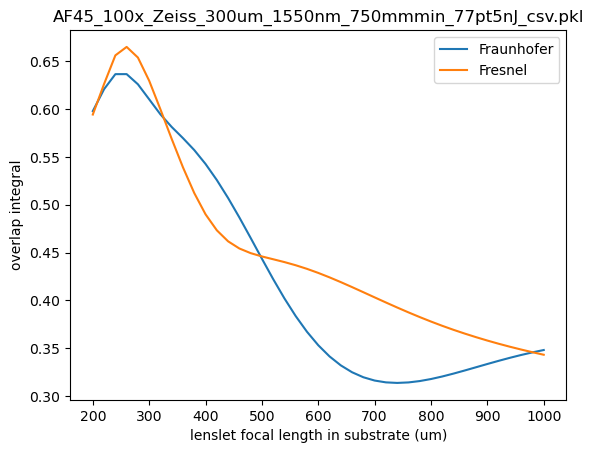

In [5]:
wg_unique_list = df['wg_mode'].drop_duplicates().values

for wg_this in wg_unique_list:
    
    idx = df_fresnel_fraunhofer_check['wg_mode'] == wg_this
    
    df_this_combo_ff_check = df_fresnel_fraunhofer_check.loc[idx]

    plt.clf()
    plt.plot(df_this_combo_ff_check['f_lens_substrate micron'],df_this_combo_ff_check['overl_int_circ_fraun'],label='Fraunhofer')
    plt.plot(df_this_combo_ff_check['f_lens_substrate micron'],df_this_combo_ff_check['overl_int_circ_fresnel'],label='Fresnel')
    plt.xlabel('lenslet focal length in substrate (um)')
    plt.ylabel('overlap integral')
    plt.title(wg_this)
    plt.legend()
    plt.savefig('junk_fraun_fres_check_' + wg_this + '.pdf')

In [29]:
# where is coupling maximized with any thickness

idx_max = np.logical_and(df_fresnel_fraunhofer_check['overl_int_circ_fraun'] > 0.71,df_fresnel_fraunhofer_check['overl_int_circ_fresnel'] > 0.71)
df_fresnel_fraunhofer_check.where(idx_max).dropna()



,f_lens_substrate micron,defocus (waves),wavel micron,wg_mode,overl_int_circ_fraun,overlap_int_hex_fraun,overl_int_circ_fresnel,overlap_int_hex_fresnel
100,560.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ...,0.718783,0.717993,0.711645,0.707939
101,580.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ...,0.715885,0.718573,0.718693,0.716107
102,600.0,0.0,1.01606,AF45_100x_Zeiss_300um_1550nm_2000mmmin_67pt5nJ...,0.711135,0.716919,0.723965,0.722610
